In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import warnings
warnings.simplefilter(action='ignore')

In [2]:
test_df = pd.read_csv('test.csv', index_col=0)
train_df = pd.read_csv('train.csv', index_col=0)
code_d = pd.read_csv('D_code.csv')
code_h = pd.read_csv('H_code.csv')
code_l = pd.read_csv('L_code.csv')
submission_df = pd.read_csv('sample_submission.csv')
code_d.drop(labels='Unnamed: 5', axis=1, inplace=True)

In [3]:
for i in ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn'] :
    train_df[i] = train_df[i].astype('int')
    test_df[i] = test_df[i].astype('int')

In [4]:
# target 비율
train_df.target.value_counts(sort=False)/len(train_df)

0    0.50026
1    0.49974
Name: target, dtype: float64

In [5]:
# null 수
sum(train_df[train_df.isna()].count()) # 0
sum(test_df[test_df.isna()].count())   # 0

0

In [107]:
train_person_df = train_df.iloc[:,7:19]
train_content_df = train_df.iloc[:,19:30]
test_person_df = test_df.iloc[:,7:19]
test_content_df = test_df.iloc[:,19:30]

# random forest baseline 0.62704

In [7]:
# from sklearn.ensemble import RandomForestClassifier

# train_x = train_df.iloc[:,:30]
# train_y = train_df.iloc[:,[-1]]
# test_x = test_df.iloc[:,:30]
# test_y = test_df.iloc[:,[-1]]

# rf = RandomForestClassifier(max_depth=20)
# rf.fit(train_x, train_y)
# print(rf.score(train_x, train_y))  # 0.8726947451046019
# pred_y = rf.predict(test_x)

# submission_df['target'] = pred_y
# # submission_df.to_csv('sub1.csv', index=False)

In [9]:
code_d.columns = ['d_code', 'd_section_code', 'd_small_code', 'd_midium_code', 'd_large_code']
code_l.columns = ['l_code', 'l_section_code', 'l_small_code', 'l_midium_code', 'l_large_code']
code_h.columns = ['h_code', 'h_upper_code']

In [115]:
TARGET = test_person_df

d = ['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3']
h = ['person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3']

person_res_d = pd.DataFrame()
person_res_h = pd.DataFrame()

for idx in tqdm(range(len(TARGET))):
    tmp_d = pd.DataFrame()
    tmp_h = pd.DataFrame()
    for col in d :  # ['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3']  #  ['contents_attribute_d']
        tmp_code_num = TARGET[col][idx]
        t = code_d[code_d['d_code']==tmp_code_num]
        t.drop('d_code', axis=1, inplace=True)
        t.index = [idx]
        t = t.add_prefix(col)
        tmp_d = pd.concat([tmp_d, t], axis=1)
    person_res_d = person_res_d.append(tmp_d, ignore_index=True)
    
    for col in h :  # ['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3']  #  ['contents_attribute_d']
        tmp_code_num = TARGET[col][idx]
        t = code_h[code_h['h_code']==tmp_code_num]
        t.drop('h_code', axis=1, inplace=True)
        t.index = [idx]
        t = t.add_prefix(col)
        tmp_h = pd.concat([tmp_h, t], axis=1)
    person_res_h = person_res_h.append(tmp_h, ignore_index=True)
    
    
# res.to_csv('person_d_code_detail.csv', index=False)

  0%|          | 0/46404 [00:00<?, ?it/s]

In [120]:
# content

d = ['contents_attribute_d']
h = ['contents_attribute_h']
l = ['contents_attribute_l']

TARGET = test_content_df

content_res_d = pd.DataFrame()
content_res_h = pd.DataFrame()
content_res_l = pd.DataFrame()

for idx in tqdm(range(len(TARGET))):
    tmp_d = pd.DataFrame()
    tmp_h = pd.DataFrame()
    tmp_l = pd.DataFrame()
    for col in d :  # ['contents_attribute_d']
        tmp_code_num = TARGET[col][idx]
        t = code_d[code_d['d_code']==tmp_code_num]
        t.drop('d_code', axis=1, inplace=True)
        t.index = [idx]
        t = t.add_prefix(col)
        tmp_d = pd.concat([tmp_d, t], axis=1)
    content_res_d = content_res_d.append(tmp_d, ignore_index=True)
    
    for col in h :
        tmp_code_num = TARGET[col][idx]
        t = code_h[code_h['h_code']==tmp_code_num]
        t.drop('h_code', axis=1, inplace=True)
        t.index = [idx]
        t = t.add_prefix(col)
        tmp_h = pd.concat([tmp_h, t], axis=1)
    content_res_h = content_res_h.append(tmp_h, ignore_index=True)
    
    for col in l : 
        tmp_code_num = TARGET[col][idx]
        t = code_l[code_l['l_code']==tmp_code_num]
        t.drop('l_code', axis=1, inplace=True)
        t.index = [idx]
        t = t.add_prefix(col)
        tmp_l = pd.concat([tmp_l, t], axis=1)
    content_res_l = content_res_l.append(tmp_l, ignore_index=True)
    
# content_res_l.to_csv('content_l_code_detail.csv', index=False)
# content_res_h.to_csv('content_h_code_detail.csv', index=False)
# content_res_d.to_csv('content_d_code_detail.csv', index=False)

  0%|          | 0/46404 [00:00<?, ?it/s]

In [138]:
new_train = pd.concat([train_person_df, train_content_df], axis=1)
new_train_y = train_df.iloc[:,[-1]]

new_test = pd.concat([test_person_df, person_res_d, person_res_h, test_content_df, content_res_d, content_res_h, content_res_l], axis=1)
new_test_y = test_df.iloc[:,[-1]]

,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,...,contents_attribute_h,contents_attribute_dd_section_code,contents_attribute_dd_small_code,contents_attribute_dd_midium_code,contents_attribute_dd_large_code,contents_attribute_hh_upper_code,contents_attribute_ll_section_code,contents_attribute_ll_small_code,contents_attribute_ll_midium_code,contents_attribute_ll_large_code
0,1,2,1,857,851,1227,4,1,1,263,...,263,836,824,831,744,250,1146,1128,1021,2010
1,0,2,2,683,1086,662,2,1,1,258,...,263,276,274,274,216,250,1610,1606,1605,2016
2,3,2,1,514,790,1233,0,1,1,177,...,177,490,482,490,482,169,1812,1811,1810,2020
3,2,2,5,114,181,175,4,1,1,177,...,177,145,56,123,1,169,101,100,99,2006
4,6,4,5,1082,1078,1056,5,1,1,178,...,177,1097,1093,1094,926,169,984,980,954,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,0,4,1,147,46,145,4,1,1,2,...,91,145,56,123,1,85,759,759,759,2006
46400,0,4,1,176,120,159,4,1,1,86,...,91,145,56,123,1,85,759,759,759,2006
46401,0,3,1,145,46,147,5,1,1,288,...,288,145,56,123,1,277,759,759,759,2006
46402,3,3,2,145,46,147,6,1,1,288,...,288,145,56,123,1,277,759,759,759,2006


In [164]:
from sklearn.model_selection import train_test_split

new_train_x, new_val_x, new_train_y, new_val_y = train_test_split(new_train, new_train_y, test_size=0.3 ,random_state=777)

In [169]:
from sklearn.ensemble import RandomForestClassifier

for i in tqdm([20,25,30,35,40]) :
    rf = RandomForestClassifier(max_depth=i, random_state=777)
    rf.fit(new_train_x, new_train_y)
    score = rf.score(new_val_x, new_val_y)  # 0.8610222910204383
    
    print(f'max_depth : {i}')
    print(f'  score   : {score}')
    print()

  0%|          | 0/5 [00:00<?, ?it/s]

max_depth : 20
  score   : 0.6164384471331996

max_depth : 25
  score   : 0.6174079927748928

max_depth : 30
  score   : 0.6153626499143346

max_depth : 35
  score   : 0.6139548165168077

max_depth : 40
  score   : 0.6121551804284595



In [186]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

model = GradientBoostingClassifier(random_state=777)
model.fit(new_train_x, new_train_y)
score = model.score(new_val_x, new_val_y)
print('GradientBoostingClassifier : ',score)

model = AdaBoostClassifier(random_state=777)
model.fit(new_train_x, new_train_y)
score = model.score(new_val_x, new_val_y)
print('AdaBoostClassifier : ',score)

model = ExtraTreesClassifier(random_state=777)
model.fit(new_train_x, new_train_y)
score = model.score(new_val_x, new_val_y)
print('ExtraTreesClassifier : ',score)

model = BaggingClassifier(random_state=777)
model.fit(new_train_x, new_train_y)
score = model.score(new_val_x, new_val_y)
print('BaggingClassifier : ',score)

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=30)
model.fit(new_train_x, new_train_y)
score = model.score(new_val_x, new_val_y)
print('XGBClassifier : ',score)

GradientBoostingClassifier :  0.5947432032194228
AdaBoostClassifier :  0.575312446044121
ExtraTreesClassifier :  0.6089211480482913
BaggingClassifier :  0.578792185196499


In [234]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [214]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

xgb_param_grid = {
    'n_estimators' : [5],  # 200,400,600
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],  #  
    'max_depth' : [10, 20]  # 
}

xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, scoring='accuracy', n_jobs=-1, cv=3 ,verbose=2)
xgb_grid.fit(new_train_x, new_train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[07:38:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [220]:
print('최고 평균 정확도 : {0: .4f}'.format(xgb_grid.best_score_))
print('최고의 파라미터 : ', xgb_grid.best_params_ )

최고 평균 정확도 :  0.5931
최고의 파라미터 :  {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 5}


In [221]:
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
4,"{'learning_rate': 0.2, 'max_depth': 10, 'n_est...",0.593150,1
3,"{'learning_rate': 0.15, 'max_depth': 10, 'n_es...",0.591823,2
2,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.587813,3
1,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.584822,4
0,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.581404,5


In [246]:
import lightgbm as lgb

In [350]:
params = {
    'learning_rate' : 0.05,
        'max_depth' : 32,
    'objective' : 'binary',
    'metric' : 'binary_logloss',
    'is_training_metric' : True,
    'num_leave' : 144,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.7,
    'bagging_freq':5,
    'seed':2020
}

In [248]:
train_dataset = lgb.Dataset(new_train_x, label=new_train_y)
val_dataset = lgb.Dataset(new_val_x, label=new_val_y)

model = lgb.train(params, train_dataset, 1000, val_dataset, verbose_eval=100, early_stopping_rounds=100)

In [321]:
train_x = train_df.iloc[:,:30]
train_y = train_df.iloc[:,[-1]]

default_train_x, default_val_x, default_train_y, default_val_y = train_test_split(train_x, train_y, test_size=0.3, random_state=777)

default_train_dataset = lgb.Dataset(default_train_x, label=default_train_y)
default_val_dataset = lgb.Dataset(default_val_x, label=default_val_y)

In [351]:
model = lgb.train(params, default_train_dataset, 1000, default_val_dataset, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 175481, number of negative: 175884
[LightGBM] [Warning] Auto-c

In [352]:
pred_y = model.predict(default_val_x)
pred_y = [1 if i>0.5 else 0 for i in pred_y]
accuracy_score(default_val_y, pred_y)  
# 0.6171755674498294
# 0.6222225173654922
# 0.6269440718260662 -> 0.64806  // 2021-12-23 14:54
# 0.6292749658002736 

0.6292749658002736

In [341]:
default_test_y = test_df.iloc[:,:30]

In [353]:
pred_y = model.predict(default_test_y)
pred_y = [1 if i>0.5 else 0 for i in pred_y]

In [354]:
submission_df['target'] = pred_y

In [355]:
submission_df.to_csv('sub7.csv', index=False)

In [369]:
# 모든 값이 1이기 때문에 제거
eda.drop(['person_prefer_g', 'person_prefer_f'], axis=1, inplace=True)

In [368]:
eda = pd.concat([new_train_x, new_train_y], axis=1)

<AxesSubplot:>

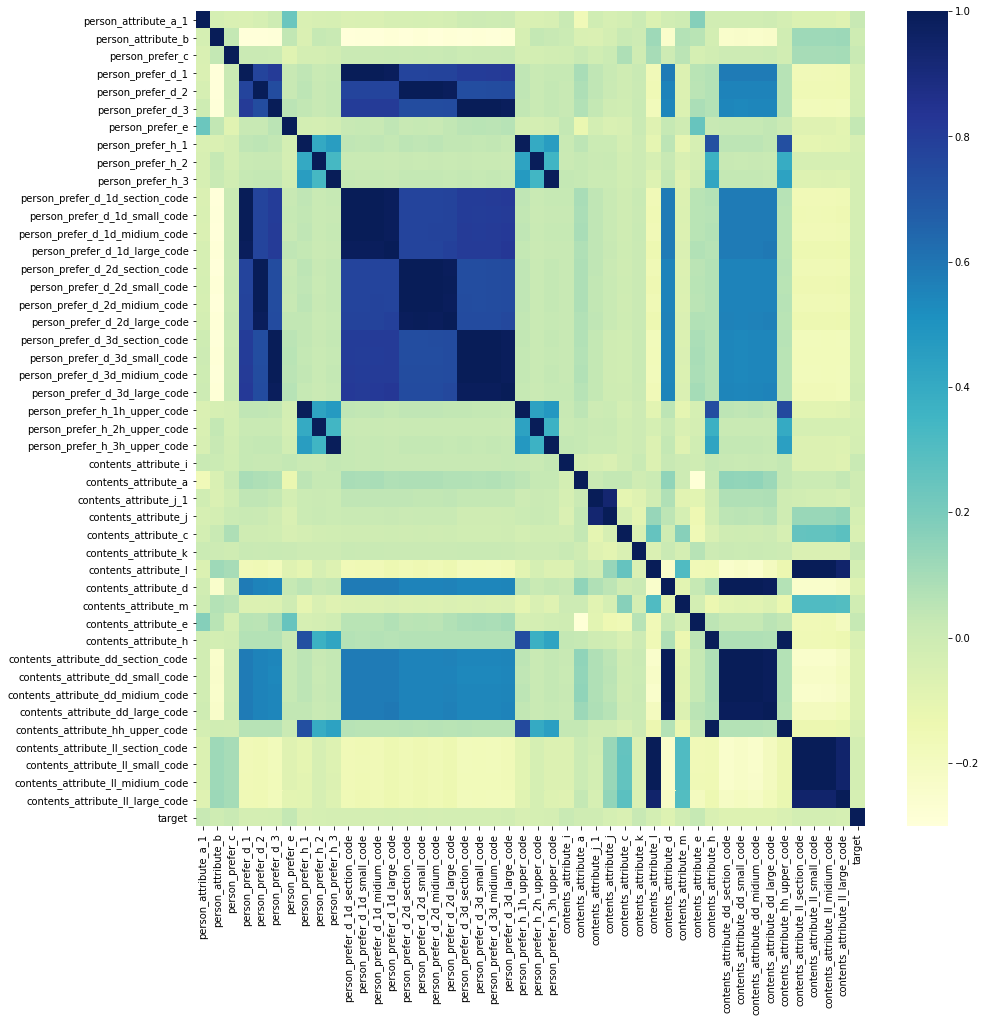

In [373]:
plt.figure(figsize=(15,15))
sns.heatmap(eda.corr(),cmap='YlGnBu')